## 의사결정나무와 랜덤 포레스트(예측/분류 모델)

### 1. 분류나무와 회귀나무

- 분류기준

|분류나무|회귀나무|
|---|---|
|엔트로피, 지니계수| 잔차제곱합|

#### 1) 분류나무 

분류기준 : 불순도(Impurity)를 낮추고 순도(Homogeneity)를 높임 (노드 내 : 동질성을 높이고, 노드 간 : 이질성을 높인다)

불순도 : 기준 - 지니계수, 엔트로피 (지니계수나 엔트로피가 증가 혹은 감소한 양을 정보 획득량이라 한다.)

##### 지니계수  : 
공식 : $1 - (A그룹/전체인원)^2 - (B그룹/전체인원)^2 ...$ => 1에서 전체관측치 수 중에서 각 카테고리가 차지하는 수의 비율을 제곱해서 빼면 된다. 

예시 

<기존>
총 20명 (45세 이상 13 + 45세 미만 7)

- > 기존 지니계수 1 - (13/20)^2 - (7/20)^2 = 0.455

<구분1 : 45세 미만 중에서>
자차 보유 10
자차 미보유 1

-> 지니계수 A = 1 - (10/11)^2 - (1/11)^2 = 0.165

---------------------------

<구분2 : 45세 이상 중에서>
자차 보유 3
자차 미보유 6

-> 지니계수 B = 1 - (3/9)^2 - (6/9)^2 = 0.444

---------------------------

기준 : 45세 연령 => 정보획득량 : B - A = 0.444 - 0.165 

하지만 분류된 집단이 많아질수록 지니계수가 커지는 문제가 발생 => 데이터의 비율만큼 가중치 부여

45세 미만 집단은 20명 중 11명 => 11/20 가중치 부여
45세 이상 집단은 20명 중 9명 => 9/20 가중치 부여

0.455 - (0.165 x 11/20) - (0.444 x 9/20) = 0.164

##### 엔트로피

이진로그 (0~1사이 범위의 값을 갖는다.) ($log_2$)

0에서 전체 관측치 수 중에서 각 카테고리가 차지하는 수의 비율에 이진로그를 취한 동일한 비율을 곱한 값을 빼면 된다. 

#### 2) 회귀나무

회귀나무도 분류나무와 유사한 콘셉트로 가지를 분기 

다만 종속변수가 연속형변수이기 때문에 잔차제곱합 등의 분류기준을 사용

회귀나무는 종속변수의 비선형성에 영향을 받지 않기 때문에 일반 선형회귀분석에 비해 모델활용이 까다롭지 않다. (왜냐하면 회귀나무는 구역을 나누어 값을 예측하기 때문이다. )

- 분류기준 : MSE

= 회귀나무는 종속변수의 잔차 제곱합이 최소화되는 구간을 구분하여 분기하는 방식으로 활용. 

= 회귀나무는 끝 노드에 속한 데이터 값의 평균을 구해 회귀 예측값 계산

- 분류기준 : F-value, 분산의 감소량

= F-value가 크다는 것은 노드 간의 이질성이 높다는 것. F-value가 최대한 커지는 방향으로 자식 노드를 나눈다.

= 분산의 감소량의 경우, 한 노드에 속한 관측치 값들의 분산이 작아진다는 것은 동질성이 높다는 것을 의미. 노드의 분산이 최소화되도록 자식 노드를 나눈다.

### 의사결정나무의 장단점

- 장점 : 직관적이고 어렵지 않다. 비선형모델이기 때문에 회귀분석과 같이 데이터의 선형성, 정규성, 등분산성 등이 필요하지 않음.

- 단점 : 

학습데이터와 예측데이터의 연속형 변숫값 편차가 큰 경우 예측력이 떨어질 수 있다. 

학습데이터에 과적합될 확률이 높다. (가지가 분기될수록 학습데이터에 대한 정확도는 증가하지만 특정 수준 이상 가지가 증가하게 되면 모델의 일반화가 어려워진다. = 따라서 규칙들을 좀 더 심플하게 만들과 일반화시키는 과정이 필요하다.)

### 의사결정나무 모델의 과적합 방지를 위한 방법

가지치기(Pruning), 정보 획득량 임계값(Threshold) 설정, 한 노드에 들어가는 최소 데이터 수 제한하기, 노드의 최대 깊이 제한하기

#### 1) 가지치기
모델의 분기 가지들을 적절히 쳐내어 과도하게 세밀하게 분기된 부분들을 없애주는 것. 데이터를 버리는 것이 아니라, 분기를 합치는 것. 

적절한 기준? : 분기 가지가 많아질수록 학습데이터의 오분류율은 낮아지게 되고, 특정 수준 이상이 되면 검증데이터의 오분류율은 높아지는(과대적합) 원리 이용

#### 2) 정보 획득량 임계값(Threshold) 설정
분기를 했을 때 정보 획득량이 너무 적으면 분기를 멈추도록 설정하는 것

#### 3) 한 노드에 들어가는 최소 데이터 수 제한, 노드의 최대 깊이 제한.
가지가 너무 세세하게 분리되는 것을 방지해줌. 

### 2. 랜덤포레스트

의사결정나무 모델은 학습 성능의 변동이 크다는 문제  -> 보완 : 랜덤포레스트

나무를 여러개 만들어 학습 = 나무를 여러개 만들어 학습을 하게 되면 다양한 상황을 고려하여 학습이 되기 때문에 과적합을 방지할 수 있다. (앙상블 학습)

부트스트랩 => 배깅 기반 앙상블

#### 부트스트랩 :
데이터셋을 중복을 허용하여 무작위로 여러번 추출하는 것(일반적으로 전체 독립변수 개수의 제곱근). 데이터 분석에 잇어 부트스트랩은 신뢰구간에 대한 통계적 추정의 정확도를 높이는데 사용.

#### 배깅:
여러 개의 의사결정 나무를 하나의 모델로 결합해주는 것. 분류모델은 투표방식(voting)으로 집계/예측모델은 평균(average)로 집계

cf. 부스팅(boosting) - 배깅은 모델의 일반화에 초점을 맞춘 방식이라면, 부스팅은 맞추기 어려운 문제를 맞히는 데 더 특화.

배깅과 부스팅은 중복을 허용하여 랜덤 샘플링을 하는 방식은 동일하지만, 부스팅은 `각 트리모델을 순차적으로 학습`하여 `정답과 오답에 가중치`를 부여해준다는 차이가 있다. = 정밀한 예측이 가능하지만 과적합의 위험, 이상치에 취약하다는 단점.

************
## 실습

1. 패키지 임포트

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 

#의사결정나무(분류모델)
from sklearn.tree import DecisionTreeClassifier 

#의사결정나무 시각화 패키지
import pydotplus 
from sklearn.tree import export_graphviz

#이미지 파일 표시 패키지
from IPython.core.display import Image

from sklearn.metrics import accuracy_score

# 앙상블 학습
from sklearn.ensemble import RandomForestClassifier

# 분류 결과 평가. 요약정보 제공하는 도구
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


2. 데이터 불러오기 및 확인

In [2]:
df = pd.read_csv('../datasets/glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


> 종속변수 : 유리의 종류('Type') <br>
> 독립변수 : RI	Na	Mg	Al	Si	K	Ca	Ba	Fe

3. 칼럼 정보 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


> 분류나무=> Type의 int형을 문자형으로 변환해야한다.

4. Type 칼럼 문자형 변환

In [4]:
df['Type_str'] = df['Type'].apply(str)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Type_str
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1


5. 의사결정나무 모델용 데이터셋 가공

In [5]:
# 독립변수, 종속변수 분리
df_x = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
df_y = df[['Type_str']]

In [6]:
# 학습데이터 검증데이터 분할(6:4)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.4, random_state=10)

print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  128
test data 개수:  86


6. 의사결정나무 모델 학습

In [7]:
# 의사결정나무 모델 적용

# 모델 생성 및 학습
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

> dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)

: criterion(결정트리의 분할기준. default='gini')

: max_depth(각 결정 트리의 최대 깊이 제한. default=None) : 과적합 방지를 위함(최대 층이 너무 많으면 모델이 너무 복잡해서 과적합이 생길 수 있다.)

In [8]:
# 테스트셋 예측값 
y_pred = dt_model.predict(x_test)

# 정확도 계산
accuracy_score(y_test, y_pred)

0.6046511627906976

7. 의사결정나무 변수 중요도 확인

In [9]:
# 독립변수 중요도 확인
dt_model.feature_importances_

pd.DataFrame({'feature': x_train.columns, 
              'importance': dt_model.feature_importances_})

,feature,importance
0,RI,0.155844
1,Na,0.082840
2,Mg,0.320142
3,Al,0.154475
4,Si,0.088100
5,K,0.038926
6,Ca,0.159674
7,Ba,0.000000
8,Fe,0.000000


> feature_importances_ : 각 독립변수가 종속변수의 분류예측에 얼마나 중요한지 나타냄. importance의 합은 1. 값이 클수록 분류에 강한 영향을 미치는 것.

> Mg(0.320142), RI(0.155844), Ca(0.159674) 변수가 분류예측에 영향을 크게 미친다. 

8. 의사결정나무 시각화

In [10]:
# 시각화 세부 옵션 설정
dot_data = export_graphviz(dt_model, out_file=None, feature_names=x_train.columns,
                           class_names=dt_model.classes_, filled=True, rounded=True,
                           special_characters=True)

> export_graphviz 파라미터 설명
- estimator : 시각화하려는 의사결정 트리모델 지정
- out_file (default:None): 그래프 데이터를 파일로 저장할 경우 파일 경로를 지정
- feature_names : 독립변수의 이름을 나타내는 문자열 리스트 제공
- calss_names : 종속변수의 이름을 나타내는 문자열 리스트 제공
- filed(default:False) : 노드의 색상지정 (True로 설정하면 노드의 색상을 지니'불순도'(또는 엔트로피)를 기준으로 칠할 수 있다)
- rounded(default:False) : 노드 상자의 모서리를 둥글게 처리할지 여부 설정
- special_characters(default:True) : 특수문자(예시:한글)를 그래프에 설정.

In [12]:
# 시각화
dot_data
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

> 'GraphViz's executables not found' 에러 발생 : 환경변수를 등록하지 않아서 발생하는 문제 => 환경변수에 Graphviz 추가해주기

In [20]:
import os
os.environ['PATH'] += os.pathsep + 'c:/Program Files (x86)/Graphviz 2.44.1/bin'

In [21]:
# 시각화
dot_data
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: Program terminated with status: 1. stderr follows: Format: "png" not recognized. Use one of:


> 'Program terminated with status: 1. stderr follows: Format: "png" not recognized. Use one of': 에러코드 

> 해결 : cmd 관리자 권한 실행 -> dot -c 입력

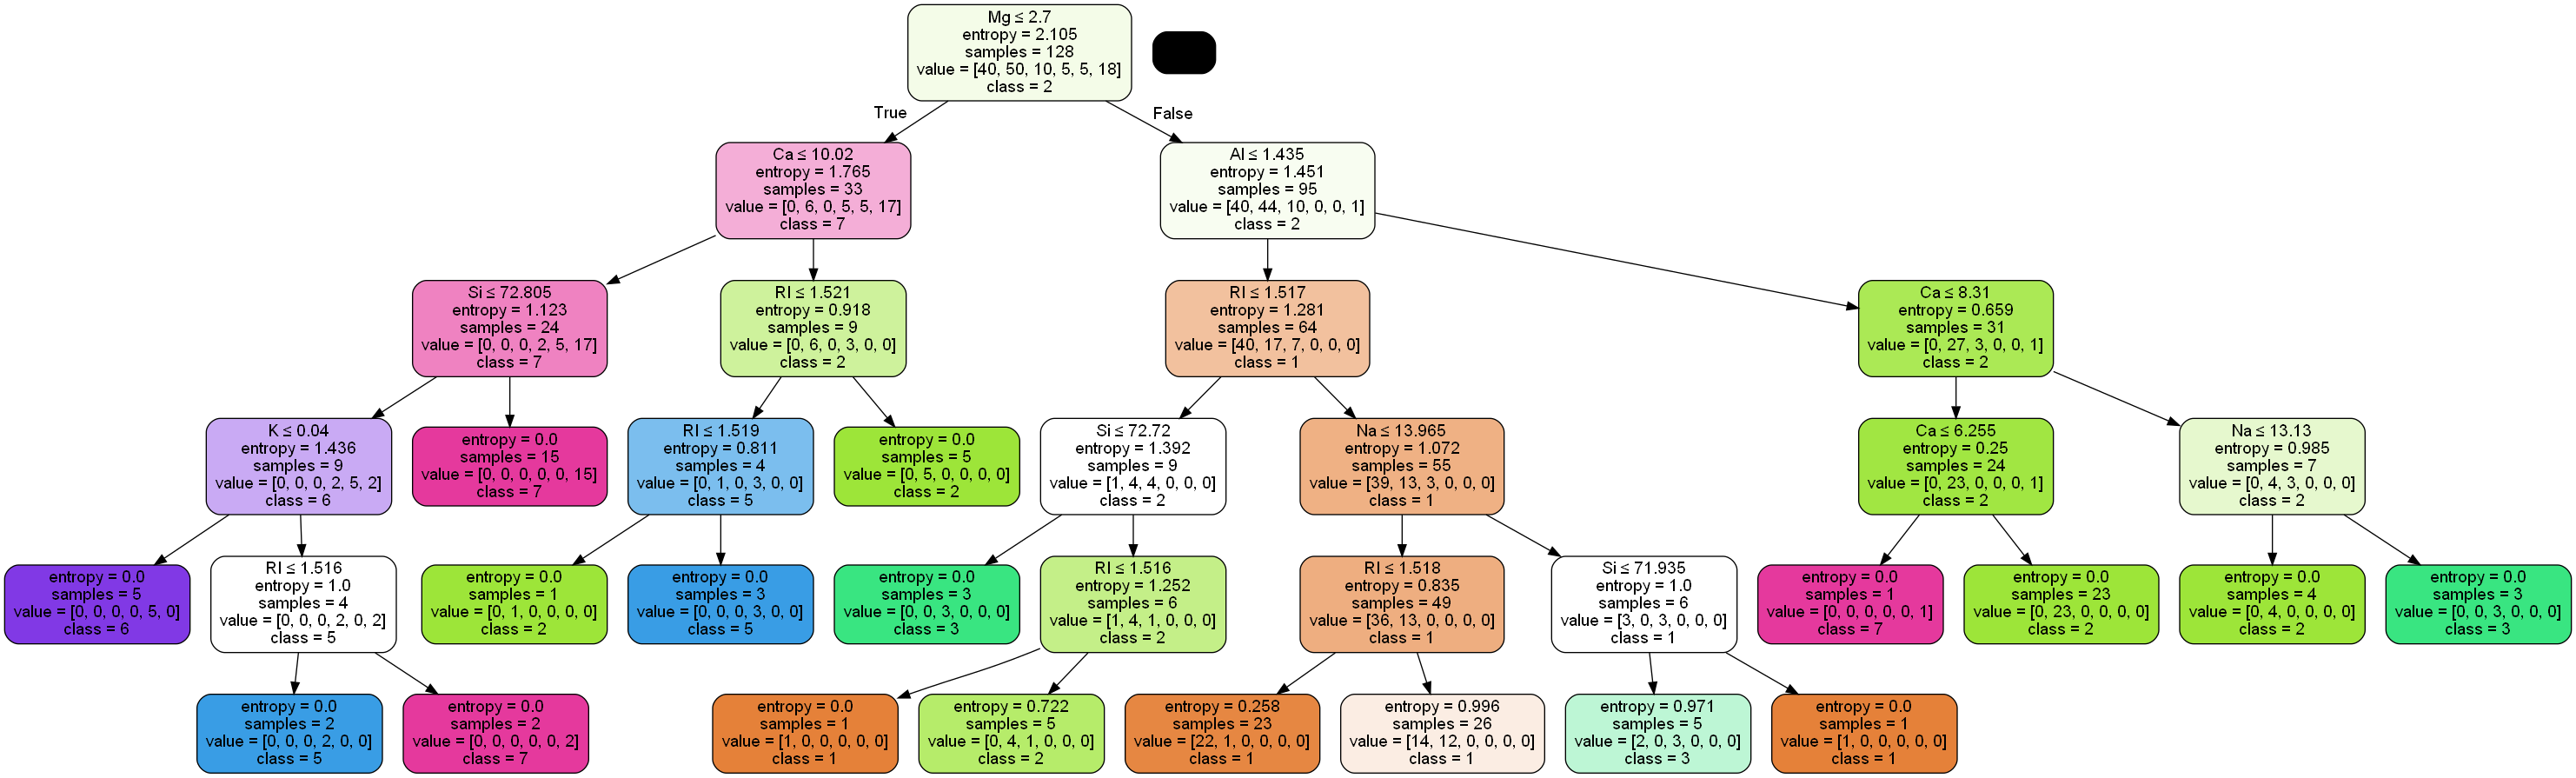

In [22]:
# 시각화
dot_data
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

9. 랜덤포레스트 모델 생성 (ensemble randomforest)

In [27]:
# 기본 모델
# rnf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)

rnf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0,
                                   bootstrap=True, class_weight=None, criterion='gini',
                                   max_features='sqrt', max_leaf_nodes=None,
                                   min_impurity_decrease=0.0, min_samples_leaf=1,
                                   min_samples_split=2, min_weight_fraction_leaf=0.0,
                                   n_jobs=None, oob_score=False, verbose=0,
                                   warm_start=False)

rnf_model.fit(x_train, y_train)

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, random_state=0)

##### max_features = 'auto' 오류 남..
##### max_features : sqrt(default), log2, None, * int or float

If int, then consider max_features features at each split.

If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.

If “sqrt”, then max_features=sqrt(n_features).

If “log2”, then max_features=log2(n_features).

If None, then max_features=n_features.

Changed in version 1.1: The default of max_features changed from "auto" to "sqrt".

> RandomForestClassifier 파라미터
- n_estimators: 
- max_depth (default:None): 결정트리의 최대깊이
- max_leaf_nodes (default:None): 최대 리프노드(말단노드)의 개수 (제한하면 트리의 크기 제한할 수 있다.)
- min_samples_split (default:2): 노드를 분할하기 위해 필요한 최소한의 샘플 수. 이 값보다 작은 샘플 수를 가진 노드는 더 이상 분할 되지 않는다.
- min_samples_leaf (default:1): 리프노드가 가져야 하는 최소한의 샘플 수
- max_features (default:None): 각 분할에서 고려할 최대 독립변수의 수 (None으로 설정하면 모든 독립변수가 고려된다.)

In [28]:
y_pred = rnf_model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7093023255813954


10. 모델 성능 출력

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.73      0.71        30
           2       0.62      0.77      0.69        26
           3       0.67      0.29      0.40         7
           5       1.00      0.75      0.86         8
           6       0.50      0.25      0.33         4
           7       0.91      0.91      0.91        11

    accuracy                           0.71        86
   macro avg       0.73      0.62      0.65        86
weighted avg       0.72      0.71      0.70        86



> 결과 해석

|구분|설명|해석|
|---|---|---|
|precision 정밀도| 양성으로 예측한 샘플 중에서 실제 양성인 샘플의 비율(TP/(TP+FP)) 즉, 양성클래스를 정확하게 예측하는 능력||
|recall 재현율.민감도| 실제 양성인 샘플 중에서 모델이 양성으로 예측한 샘플의 비율(TP/(TP+FN)) 즉, 양성클래스를 실제로 잘 감지하는 능력||
|f1-score |precision과 recall의 조화 평균(2*(Precision*Recall)/(Precision+Recall))||
|support 지지도|각 클래스(레이블)에 대한 테스트 데이터의 샘플 수. 특정 클래스의 샘플 수가 얼마나 많은지 나타낸다.||
|accuracy 정확도|모델이 올바르게 분류한 샘플의 비율(TP+TN)/(TP+TN+FP+FN)||
|macro avg 매크로 평균| 모든 클래스에 대한 성능지표를 각각 계산한 후 각 클래스의 값의 평균(클래스간 균형이 중요한 경우 사용)||
|weighted avg 가중평균|클래스별로 성능지표를 계산. 클래스별 샘플수로 가중평균 계산(클래스간 불균형이 있는 경우 사용)||

11. 랜덤포레스트 변수 중요도 확인

In [30]:
feature_imp = pd.Series(rnf_model.feature_importances_,
                        index=x_train.columns).sort_values(ascending=False)

feature_imp[:20]

Al    0.159236
Ca    0.153955
Mg    0.148816
RI    0.140340
Na    0.107937
Ba    0.090783
K     0.079957
Si    0.072258
Fe    0.046717
dtype: float64

In [32]:
sum(rnf_model.feature_importances_)

1.0000000000000002

12. 랜덤포레스트 변수 중요도 시각화

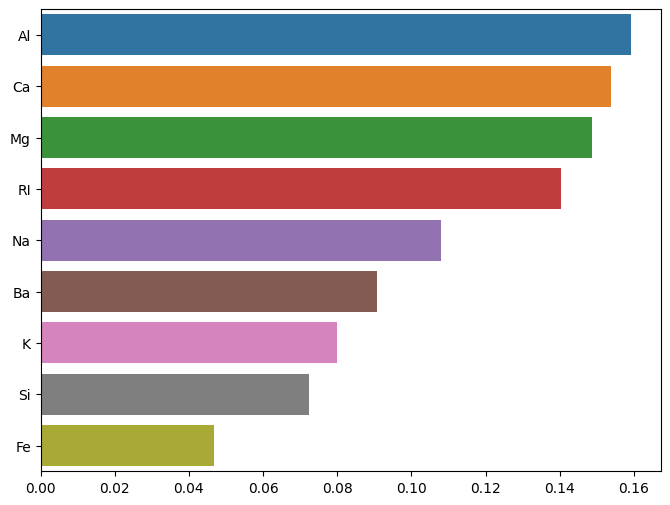

In [33]:
plt.figure(figsize=(8,6))
sb.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

> feature_importance_ 결과해석: Al, Ca, Mg, Rl, Na, Ba, K, Si, Fe 순으로 종속변수Type_str 분류에 강한 영향을 준다. 